In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")

In [34]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire


In [35]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [36]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,122.000000,122.000000,122.0,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,15.754098,7.500000,2012.0,33.163934,55.901639,15.008197,0.678689,81.102459,17.031967,5.892623,17.903279
std,8.843274,1.115259,0.0,3.675608,15.716186,2.692186,1.486759,12.244064,12.995068,4.832913,13.878868
min,1.000000,6.000000,2012.0,24.000000,21.000000,6.000000,0.000000,37.900000,0.900000,0.100000,1.400000
25%,8.000000,7.000000,2012.0,30.000000,43.250000,14.000000,0.000000,77.650000,7.325000,1.825000,7.400000
50%,16.000000,7.500000,2012.0,34.000000,56.000000,15.000000,0.000000,84.850000,13.150000,4.600000,13.900000
75%,23.000000,8.000000,2012.0,36.000000,66.750000,16.750000,0.475000,89.275000,22.900000,8.625000,23.875000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,8.700000,96.000000,65.900000,19.000000,68.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    object 
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.5+ KB


In [37]:
##data cleaning
##missing values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [38]:
df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
117    False
118    False
119    False
120    False
121    False
Length: 122, dtype: bool

In [40]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
43,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [43]:
df=df.dropna().reset_index(drop=True)

In [44]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [46]:
##data cleaning as been done on the database
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [47]:
##remvoing the sapace in column name
df.columns=df.columns.str.strip()

In [48]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          121 non-null    int64  
 1   month        121 non-null    int64  
 2   year         121 non-null    int64  
 3   Temperature  121 non-null    int64  
 4   RH           121 non-null    int64  
 5   Ws           121 non-null    int64  
 6   Rain         121 non-null    float64
 7   FFMC         121 non-null    float64
 8   DMC          121 non-null    float64
 9   DC           121 non-null    object 
 10  ISI          121 non-null    float64
 11  BUI          121 non-null    float64
 12  FWI          121 non-null    object 
 13  Classes      121 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 13.4+ KB


In [50]:
#already my database have the column are convereted into required format so next time do think about this
##changing the outehr column in 
#you can use for loop


In [52]:
#lets save the cleaned dataset
df.to_csv("CLENRED_DATASET.csv",index=False)

In [54]:
df_copy=df

In [66]:
df.drop(["day","month","year"],axis=1,inplace=True)

KeyError: "['day', 'month', 'year'] not found in axis"

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  121 non-null    int64  
 1   RH           121 non-null    int64  
 2   Ws           121 non-null    int64  
 3   Rain         121 non-null    float64
 4   FFMC         121 non-null    float64
 5   DMC          121 non-null    float64
 6   DC           121 non-null    object 
 7   ISI          121 non-null    float64
 8   BUI          121 non-null    float64
 9   FWI          121 non-null    object 
 10  Classes      121 non-null    int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 10.5+ KB


In [68]:
##encoding of the classes
df_copy["Classes"]=np.where(df_copy["Classes"].str.contains("not fire"),0,1)

AttributeError: Can only use .str accessor with string values!

In [69]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,1
1,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,1
2,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1
3,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,1
4,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,1
...,...,...,...,...,...,...,...,...,...,...,...
116,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
117,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,1
118,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
119,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [61]:
df_copy["Classes"].value_counts()

Classes
1    121
Name: count, dtype: int64

In [71]:
df.drop(["Classes"],axis=1,inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  121 non-null    int64  
 1   RH           121 non-null    int64  
 2   Ws           121 non-null    int64  
 3   Rain         121 non-null    float64
 4   FFMC         121 non-null    float64
 5   DMC          121 non-null    float64
 6   DC           121 non-null    object 
 7   ISI          121 non-null    float64
 8   BUI          121 non-null    float64
 9   FWI          121 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 9.6+ KB


In [73]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,33.132231,56.057851,14.983471,0.682645,81.038017,17.066116,5.838017,17.965289
std,3.674103,15.686139,2.689434,1.492296,12.274182,13.043604,4.815068,13.919595
min,24.000000,21.000000,6.000000,0.000000,37.900000,0.900000,0.100000,1.400000
25%,30.000000,44.000000,14.000000,0.000000,77.500000,7.200000,1.800000,7.300000
50%,34.000000,56.000000,15.000000,0.000000,84.700000,13.300000,4.500000,14.100000
75%,36.000000,67.000000,16.000000,0.500000,89.300000,23.000000,8.400000,23.900000
max,42.000000,90.000000,29.000000,8.700000,96.000000,65.900000,19.000000,68.000000


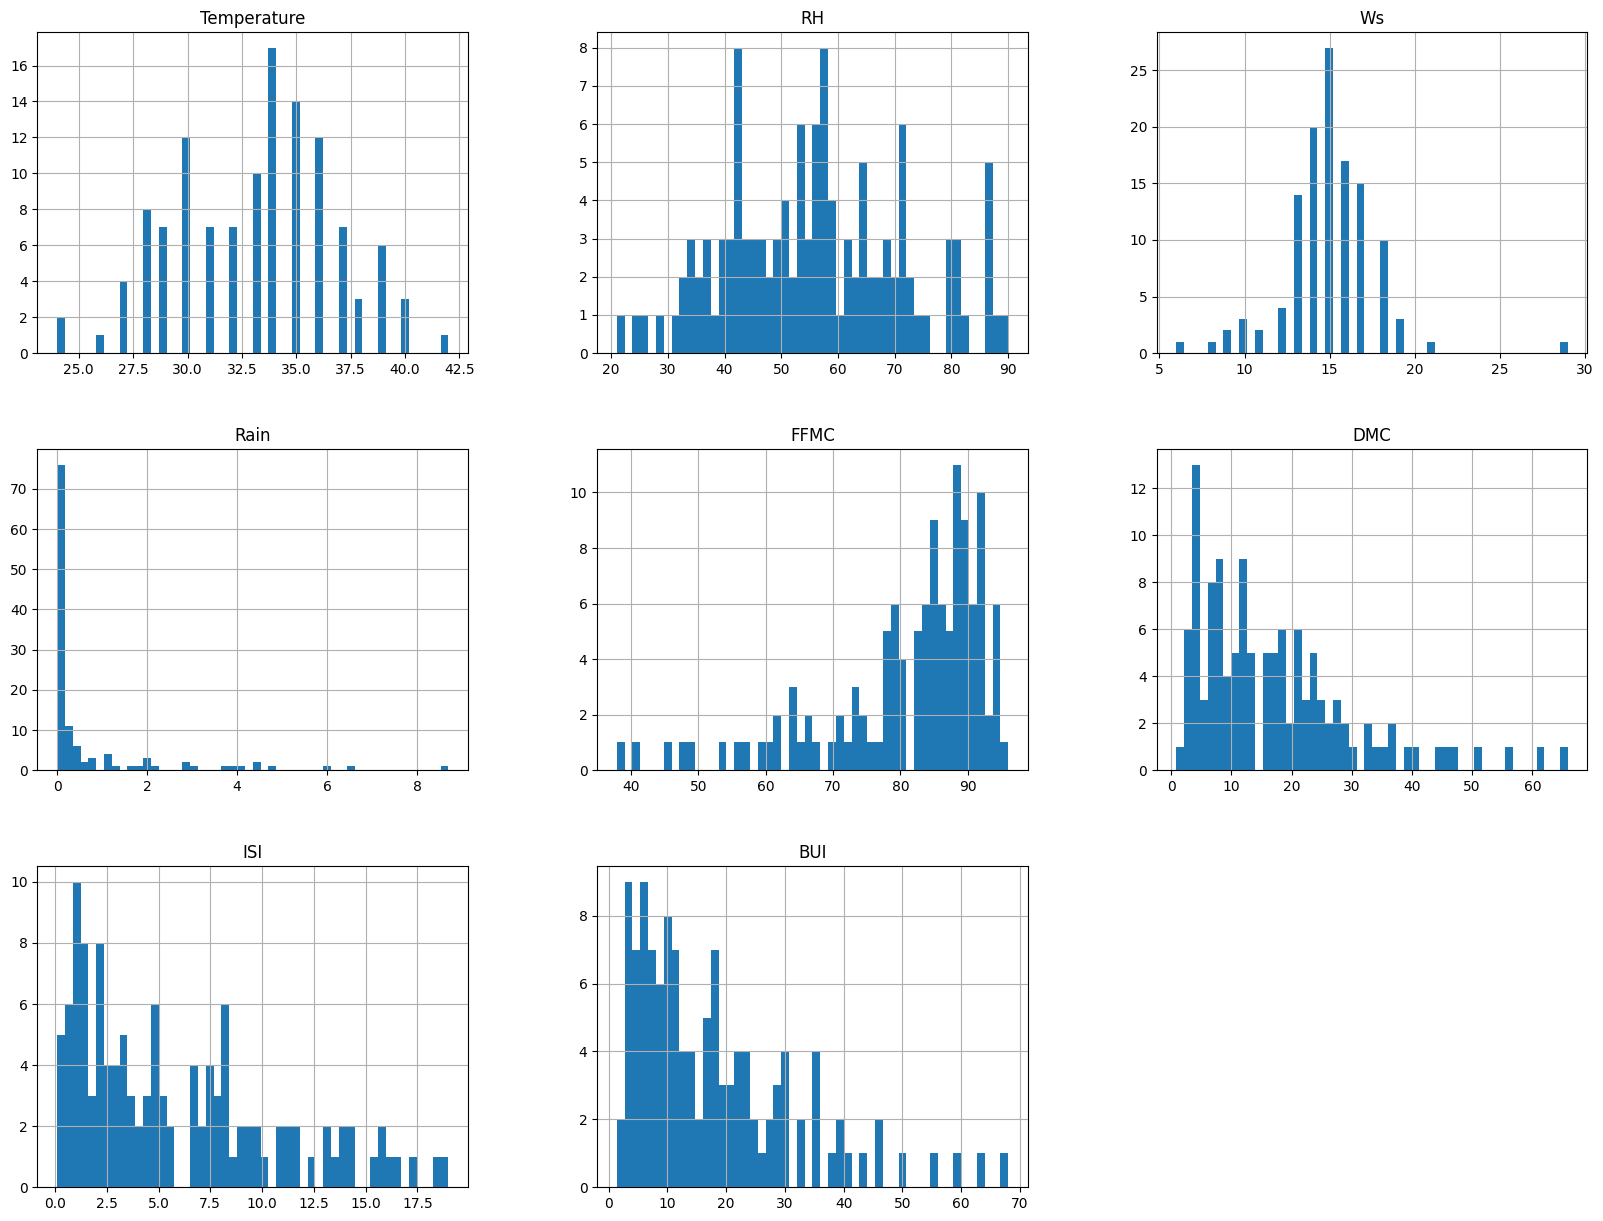

In [79]:
#plot desity plot for all

df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [81]:
##percentage of pie chart
